### Goal: Understand the M&A market since 1988 to identify trends in the companies bought by Big Tech

Step 1: Download dataset and upload it to Jupyter. 

Step 2: Create a dataframe and begin exploring and processing the dataset (include steps here)

Step n: Ask questions (and generate hypotheses) about the data and conduct online research to answer questions (or confirm hypotheses)

Ex: I see FB did 11 social media acquisitions in 2012, I research what their corporate strategy was in 2012 and figure out they were trying to grow users in Asia and all 11 acqusitions were from Asia.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
# new - understand
plt.style.use('ggplot')
import numpy as np
# new - understand
import seaborn as sns

In [2]:
df = pd.read_csv('~/Downloads/acquisitions_update_2021.csv')
df

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
0,1,Apple,1988,Mar,Network Innovations,Software,-,-,-,-
1,2,Apple,1988,Jun,Orion Network Systems,Computer Software,-,-,-,-
2,3,Apple,1988,Jun,Styleware,Computer software,-,-,-,-
3,4,Apple,1988,Jul,Nashoba Systems,Computer software,-,-,-,-
4,5,Apple,1989,Jan,Coral Software,Computer software,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...
1450,1451,Citrix,2015,Apr,Grasshopper,Telephone services,United States,-,-,"GoToMeeting, GoToTraining, GoToWebinar, ShareF..."
1451,1452,Citrix,2016,Sep,Norskale,UEM and application performance optimization,France,-,-,"XenApp, XenDesktop"
1452,1453,Citrix,2017,Jan,Unidesk,-,United States,-,-,"XenApp, XenDesktop"
1453,1454,Citrix,2018,Feb,Cedexis,Intelligent traffic management,France,-,-,Citrix ITM


### Step 1: Data Understanding

In [3]:
# understand total rows by total columns
df.shape # (1455, 10)
df.head(5) # country, acqusition price, category, derived products are empty
df.tail(5)

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
1450,1451,Citrix,2015,Apr,Grasshopper,Telephone services,United States,-,-,"GoToMeeting, GoToTraining, GoToWebinar, ShareF..."
1451,1452,Citrix,2016,Sep,Norskale,UEM and application performance optimization,France,-,-,"XenApp, XenDesktop"
1452,1453,Citrix,2017,Jan,Unidesk,-,United States,-,-,"XenApp, XenDesktop"
1453,1454,Citrix,2018,Feb,Cedexis,Intelligent traffic management,France,-,-,Citrix ITM
1454,1455,Citrix,2021,Mar,Wrike,Project management,United States,-,-,Citrix Workspace


In [4]:
# object type means that the DataFrame has columns with string or mixed datatypes. 
# I can use astype() pandas method to convert object into best data type for column, ex: string, int, categorial (similar to factor in R)
df.dtypes

ID                    int64
Parent Company       object
Acquisition Year     object
Acquisition Month    object
Acquired Company     object
Business             object
Country              object
Acquisition Price    object
Category             object
Derived Products     object
dtype: object

### Change dtypes to appropriate

Best practice in data science is to wait until the data is clean to remove types but my goal, as stated in block 1 of this notebook, doesn't need any of these columns. 

Acquisition Price is important but because of the large # of NaN values I've removed it and will evaluate the price on a case-by-case basis as the analysis continues. 

*Notes on why acquisition price is important:*

* Market value: Fundamentally the market value is what buyers/sellers are willing to pay for a company. The analysis of market value is limited to a balance sheet/income statement instead of a user base or IP which are analyzed separately. 
* Growth potential: Fundamentally growth is about how many new customers a company can get, especially at a low CAC value, to continue generating high returns for the company and consequently the acquirer. Because once the parent company purchases the acquired company the acquired companies' growth turns into parent company growth, this is an obvious metric to look at. It's especially important if growth of the acquired company is in an adjacent market to the parent company. 
* Competitive advantage: Fundamentally this is about whether the acquired company has an economic moat (can sustain long-term competitive advantage because of price, value from product, market share, etc.) 
* Customer base: If a company has a large and loyal customer base they are valued higher than customers without one. In some cases the parent company wants to acquire users and paying for an acquired company makes more economic sense than the CAC to adopt those users. **Plug:** A company I worked for in 2020/2021 was acquired by a Series A startup because of our customer base. Read [Tech Pod.](https://blog.acquire.com/when-selling-a-newsletter-business-focus-on-the-intangibles/)
* Intellectual property: When an acquired company has proprietary technology with strong patents, trademarks a parent company can see this value and opt to buy because of the fit or the parent company has another part of the tech stack understood and the acquired company can help increase the success of that stack. **Example:** Oculus and FB in 2014. 

In [5]:
df.drop(['Acquisition Price', 'Category', 'Derived Products', 'ID'], axis=1, inplace=True)

In [6]:
df

,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country
0,Apple,1988,Mar,Network Innovations,Software,-
1,Apple,1988,Jun,Orion Network Systems,Computer Software,-
2,Apple,1988,Jun,Styleware,Computer software,-
3,Apple,1988,Jul,Nashoba Systems,Computer software,-
4,Apple,1989,Jan,Coral Software,Computer software,-
...,...,...,...,...,...,...
1450,Citrix,2015,Apr,Grasshopper,Telephone services,United States
1451,Citrix,2016,Sep,Norskale,UEM and application performance optimization,France
1452,Citrix,2017,Jan,Unidesk,-,United States
1453,Citrix,2018,Feb,Cedexis,Intelligent traffic management,France


In [7]:
print(type(df['Parent Company'][0]))

<class 'str'>


In [8]:
print(type(df['Acquisition Year'][0]))

<class 'str'>


In [9]:
# Coerce Types
# Convert the column Acquisition Year into a numeric type and and for values not numeric coerce them to be NaN then convert them to type Int64
df['Acquisition Year'] = pd.to_numeric(df['Acquisition Year'], errors='coerce').astype('Int64')

In [10]:
# can view type change from str to np.int64 in three code blocks
print(type(df['Acquisition Year'][0]))

<class 'numpy.int64'>


In [11]:
df

,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country
0,Apple,1988,Mar,Network Innovations,Software,-
1,Apple,1988,Jun,Orion Network Systems,Computer Software,-
2,Apple,1988,Jun,Styleware,Computer software,-
3,Apple,1988,Jul,Nashoba Systems,Computer software,-
4,Apple,1989,Jan,Coral Software,Computer software,-
...,...,...,...,...,...,...
1450,Citrix,2015,Apr,Grasshopper,Telephone services,United States
1451,Citrix,2016,Sep,Norskale,UEM and application performance optimization,France
1452,Citrix,2017,Jan,Unidesk,-,United States
1453,Citrix,2018,Feb,Cedexis,Intelligent traffic management,France


In [12]:
# Convert Parent Company to string
df['Parent Company'] = df['Parent Company'].replace('-', np.nan).fillna('Unknown').astype(str)
df['Parent Company'] = df['Parent Company'].astype(str)

# Convert Acquired Company to string
df['Acquired Company'] = df['Acquired Company'].replace('-', np.nan).fillna('Unknown').astype(str)
df['Acquired Company'] = df['Acquired Company'].astype(str)

In [13]:
print(type(df['Parent Company'][0]))

<class 'str'>


In [14]:
# says objects because it's a pandas series.Series but if I check the index of a row like Parent Company, 
# it appears to be a string
df.dtypes

Parent Company       object
Acquisition Year      Int64
Acquisition Month    object
Acquired Company     object
Business             object
Country              object
dtype: object

Text(0.5, 1.0, 'Apple Acquisitions by Category')

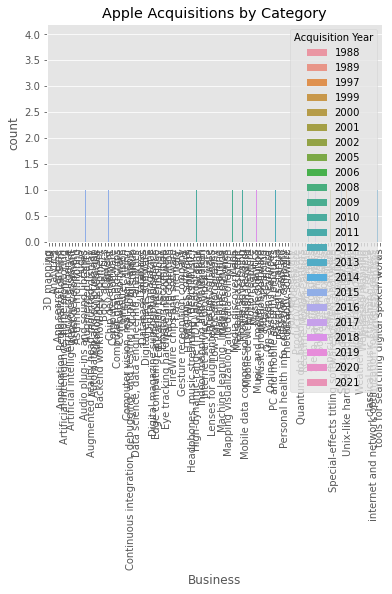

In [34]:
# Filter for Apple acquisitions
apple_df = df[df['Parent Company'] == 'Apple']

apple_categories = apple_df['Business'].unique()
# print number of unique businesses (answer: 102)
num_categories = apple_df['Business'].nunique()
#print("Number of categories: ", num_categories)


# Group by category and year and count the number of acquisitions
acquisitions_by_category = apple_df.groupby(['Business', 'Acquisition Year']).size().reset_index(name='count')

# Filter for categories that Apple has acquired companies in
acquisitions_by_category = acquisitions_by_category[acquisitions_by_category['Business'].isin(apple_categories)]

# Plot a bar chart of the number of acquisitions by category
sns.barplot(x='Business', y='count', hue='Acquisition Year', data=acquisitions_by_category)
plt.xticks(rotation=90)
plt.title('Apple Acquisitions by Category')
#plt.show() - chart looks too congested. Likely going to use PCA to reduce categories and replot

In [39]:
apple_df = pd.DataFrame(apple_df)
apple_df

,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country
0,Apple,1988,Mar,Network Innovations,Software,-
1,Apple,1988,Jun,Orion Network Systems,Computer Software,-
2,Apple,1988,Jun,Styleware,Computer software,-
3,Apple,1988,Jul,Nashoba Systems,Computer software,-
4,Apple,1989,Jan,Coral Software,Computer software,-
...,...,...,...,...,...,...
118,Apple,2020,Jul,Mobeewave,Payments startup,-
119,Apple,2020,Aug,Camerai,AR,-
120,Apple,2020,Aug,Spaces,VR startup,-
121,Apple,2021,Jan,Curious AI,Core AI startup,-


In [41]:
apple_categories = apple_df['Business'].unique()
apple_categories

array(['Software', 'Computer Software', 'Computer software',
       'Unix-like hardware and software platform', 'Macintosh clones',
       'Computer graphic chips', 'Internet software',
       'Productivity software', 'Internet service provider (ISP)',
       'Graphics software', 'Online info systems services',
       'Special effects software', 'FireWire chips and software',
       'Digital effects software',
       'internet and network optimization for wireless carriers',
       'Special-effects titling software for film and video',
       'Music production software', 'Gesture recognition company',
       'Semiconductors', 'Maps', 'Music streaming', 'Mobile advertising',
       'Voice control software', 'Application Regionalization Firm',
       'Web-based mapping', 'Facial recognition',
       'High-dynamic-range (HDR) photography', '3D mapping',
       'Flash memory', 'App search engine', 'Audio',
       'PC and mobile security products', 'HTML5 Web app firm',
       'Speech recog

### K-means review & why use

I [wrote an article](https://medium.com/python-in-plain-english/using-k-means-algorithm-to-create-customer-segmentation-tools-7712132e7ff6) on kMeans clustering in 2021 but needed a review before deciding this was best to implement. 

*How does it work:*

* Choose the number of clusters (k) to create: I've done this with CrossValidation in the past. It's a more sophisticated approach because is creates a graph that shows the scientist what the optimal k value is. In this implementation I chose 10 somewhat randomly based on earlier EDA. 
* Initialize k centroid randomly (A centroid is the mean of a cluster and is set randomly. The centroid is updated to the mean of all data points in its cluster as the developer runs the code). 
* Assign each data point to nearest centroid. 
* Compute mean of cluster and update (as mentioned in bullet 2)
* Repeat until max iterations reached or centroid stops moving 

In [107]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

# Create a CountVectorizer object to extract bag-of-words features from the "Business" column
vectorizer = CountVectorizer()

# Fit the vectorizer on the "Business" column to extract features
features = vectorizer.fit_transform(apple_df['Business'])

# Create a KMeans clustering object with k=10 clusters
kmeans = KMeans(n_clusters=10, init='k-means++', random_state=42)

# Fit the KMeans clustering model on the extracted features
kmeans.fit(features)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels as a new column in the DataFrame
apple_df['Cluster'] = cluster_labels

# Print the number of data points in each cluster
print(apple_df['Cluster'].value_counts())

6    66
8    21
1     7
9     7
4     5
0     4
2     4
3     4
5     4
7     1
Name: Cluster, dtype: int64


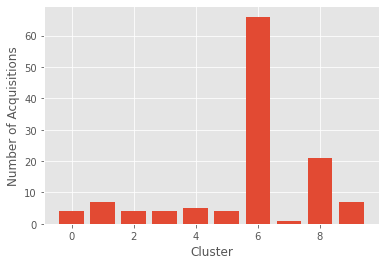

In [108]:
cluster_counts = apple_df['Cluster'].value_counts()

# Plot a histogram of the cluster counts
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Acquisitions')
plt.show()

In [109]:
apple_df

,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Cluster
0,Apple,1988,Mar,Network Innovations,Software,-,8
1,Apple,1988,Jun,Orion Network Systems,Computer Software,-,1
2,Apple,1988,Jun,Styleware,Computer software,-,1
3,Apple,1988,Jul,Nashoba Systems,Computer software,-,1
4,Apple,1989,Jan,Coral Software,Computer software,-,1
...,...,...,...,...,...,...,...
118,Apple,2020,Jul,Mobeewave,Payments startup,-,6
119,Apple,2020,Aug,Camerai,AR,-,6
120,Apple,2020,Aug,Spaces,VR startup,-,6
121,Apple,2021,Jan,Curious AI,Core AI startup,-,6


In [71]:
# hence why I don't need to use '0' in the code block below
print(type(apple_df['Cluster'][0]))

<class 'numpy.int32'>


In [116]:
cluster_6 = apple_df[apple_df['Cluster'] == 6]
print(cluster_6)

    Parent Company  Acquisition Year Acquisition Month  \
6            Apple              1997               Sep   
13           Apple              2001               May   
15           Apple              2001               Dec   
19           Apple              2002               Jun   
23           Apple              2005               Apr   
..             ...               ...               ...   
117          Apple              2020               Jun   
118          Apple              2020               Jul   
119          Apple              2020               Aug   
120          Apple              2020               Aug   
121          Apple              2021               Jan   

                Acquired Company  \
6    Power Computing Corporation   
13                      bluebuzz   
15                   PowerSchool   
19               Propel Software   
23                   FingerWorks   
..                           ...   
117                   Fleetsmith   
118            

In [112]:
# did these manually, need to decide if there's better way
cluster_labels = {0: 'AI', 1:'Computer Software', 2:'Speech Recognition', 3:'Machine Learning', 4:'Mapping', 5:'Analytics', 6:'Internet', 7:'Spoken Words', 8:'Software', 9:'Music'}

# add manual labels to dataframe
apple_df['manual_labels'] = [cluster_labels[x] for x in apple_df['Cluster']]

manual_counts = apple_df.groupby(['manual_labels', 'Business']).size()
print(manual_counts)
apple_df

manual_labels       Business                                
AI                  Artificial Intelligence, home monitoring    1
                    Artificial intelligence                     1
                    Artificial intelligence/voice assistant     1
                    Edge computing, artificial intelligence     1
Analytics           Analytics                                   1
                                                               ..
Software            Voice control software                      1
Speech Recognition  Education technology                        1
                    Speech recognition                          1
                    Speech technology                           2
Spoken Words        tools for searching digital spoken words    1
Length: 102, dtype: int64


,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Cluster,manual_labels
0,Apple,1988,Mar,Network Innovations,Software,-,8,Software
1,Apple,1988,Jun,Orion Network Systems,Computer Software,-,1,Computer Software
2,Apple,1988,Jun,Styleware,Computer software,-,1,Computer Software
3,Apple,1988,Jul,Nashoba Systems,Computer software,-,1,Computer Software
4,Apple,1989,Jan,Coral Software,Computer software,-,1,Computer Software
...,...,...,...,...,...,...,...,...
118,Apple,2020,Jul,Mobeewave,Payments startup,-,6,Internet
119,Apple,2020,Aug,Camerai,AR,-,6,Internet
120,Apple,2020,Aug,Spaces,VR startup,-,6,Internet
121,Apple,2021,Jan,Curious AI,Core AI startup,-,6,Internet


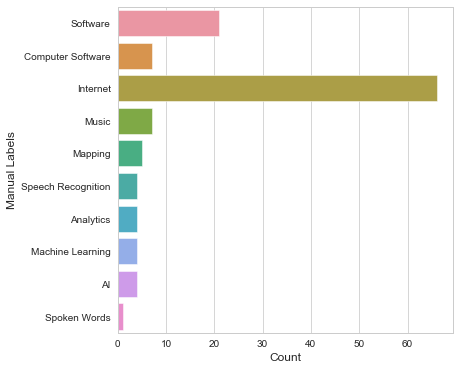

In [121]:
# Create a countplot to get the frequency of each manual label
sns.set_style("whitegrid")
plt.figure(figsize=(6, 6))
sns.countplot(data=apple_df, y="manual_labels")
plt.ylabel("Manual Labels")
plt.xlabel("Count")

# Show the plot
plt.show()

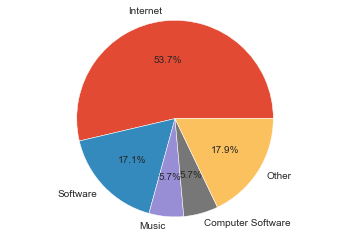

In [128]:
# Count the number of occurrences for each manual label
label_counts = apple_df['manual_labels'].value_counts()

# Get the top 4 manual labels and their counts
top_labels = label_counts[:4]
other_count = label_counts[4:].sum()

# Combine the other labels into an "Other" category
top_labels['Other'] = other_count

# Create a pie chart with the top 4 labels and "Other"
plt.pie(top_labels, labels=top_labels.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

<Figure size 1800x288 with 0 Axes>

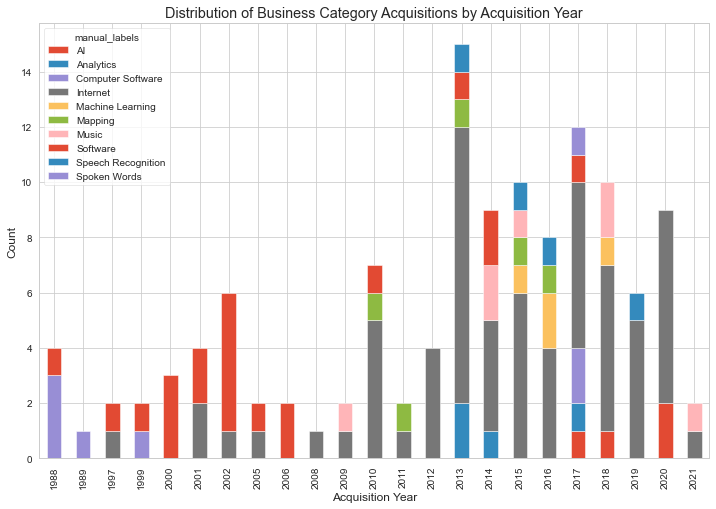

In [137]:
# Group the data by acquisition year and manual label and get the count
year_label_count = apple_df.groupby(['Acquisition Year', 'manual_labels'])['manual_labels'].count().reset_index(name='count')
#print(year_label_count)
# Create a pivot table with acquisition year as the index, manual labels as columns, and count as values
pivot_table = year_label_count.pivot(index='Acquisition Year', columns='manual_labels', values='count')
#print(pivot_table)

# Create a stacked bar chart
sns.set_style('whitegrid')
plt.figure().set_figwidth(25)
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Acquisition Year')
plt.ylabel('Count')
plt.title('Distribution of Business Category Acquisitions by Acquisition Year')
plt.show()

In [56]:
year_cluster_df = pd.concat([apple_df['Acquisition Year'], apple_df['Cluster']], axis=1)

# Print the first five rows of the new dataframe
print(year_cluster_df.head())

   Acquisition Year  Cluster
0              1988        1
1              1988        1
2              1988        1
3              1988        1
4              1989        1


### Error - including for learning

The .isna() method works when there are values in the dataframe that say NaN. In this dataframe, NaN values are represented by a dash (-) so I need to write a replace method using numpy's nan library.  

In [16]:
# count the number of non-missing values in 'Aquisition Price'
# All Aquisition Price values are missing so we can drop this column
#number_non_missing = df['Acquisition Price'].isna().sum()
#number_non_missing

In [17]:
#num_non_missing = df.isna().sum(axis=0)
#num_non_missing

### Corrected NaN count

In the first example `print(df['Category'].unique())` I can see values other than - which weren't showing up in `df.head()` or `df.tail()` commands.

In [18]:
# prints unique values to see if there are other values besides '-'
print(df['Category'].unique())

KeyError: 'Category'

In [ ]:
df['Category'] = df['Category'].replace('-', np.nan)
df['Category']